<a href="https://colab.research.google.com/github/Jaybhatt216/EIT/blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


## Mutliple Cluster Generator

In [3]:
N = 3000 #number of points 
dims = 2 # 2d
X = []
means=[]

#randomly assign k
k = 5

for i in range(k):
  X.append(np.random.randn(N,dims)+np.random.randn(1,dims)*3.6)
  means.append(np.mean(X[-1],axis=0))
X=np.vstack(X)
means = np.vstack(means)






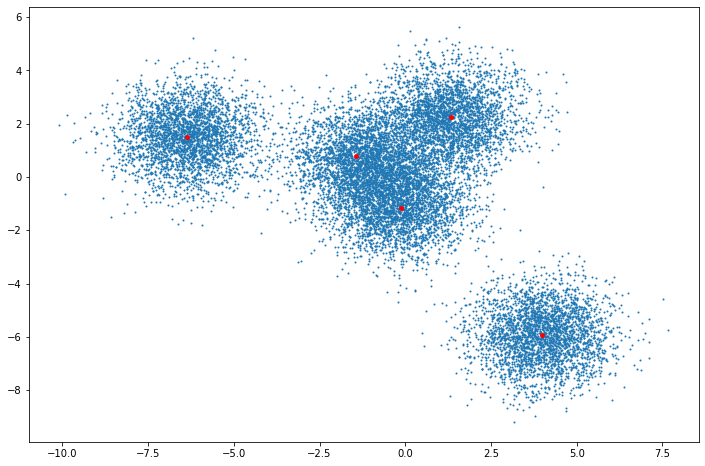

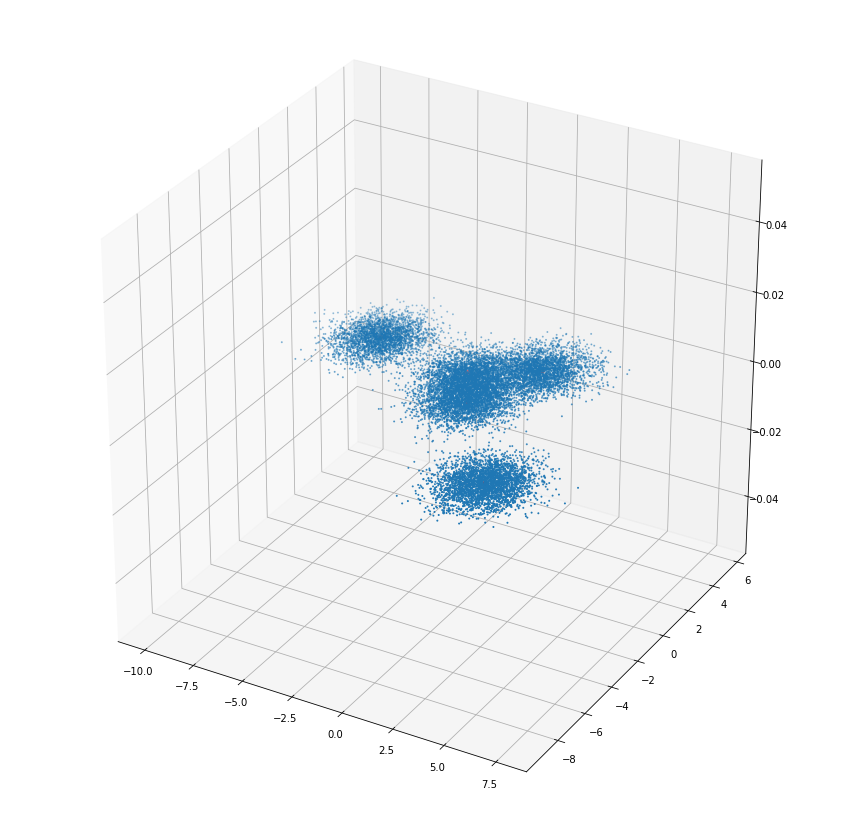

In [42]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],s=1)
plt.scatter(means[:,0],means[:,1], c='r',s=15)


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[:,0],X[:,1],s=1)
plt.scatter(means[:,0],means[:,1], c='r',s=15)

The  dots are the means for each of them

> Indented block


**bold text**

# Clustering Algorithm: K-Means

In [5]:
def Distance(x,means,*args,**kwargs):
  diff = []
  dists = []
  for mean in means:
    diff = x - mean
    dist = np.sqrt(np.sum(diff**2,axis=1,keepdims=True))
    dists.append(dist)
  
  
  return np.hstack(dists)





In [6]:
dist = Distance(X,means)
y_hat = np.argmin(dist,axis=1)#which point has the min distance to the means, its picking the min distance


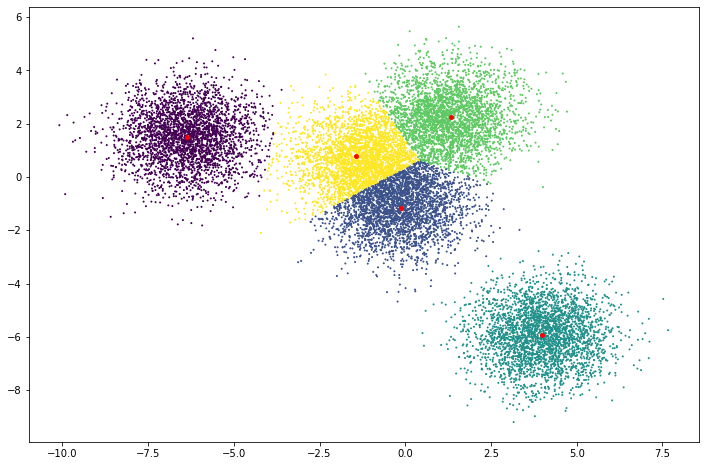

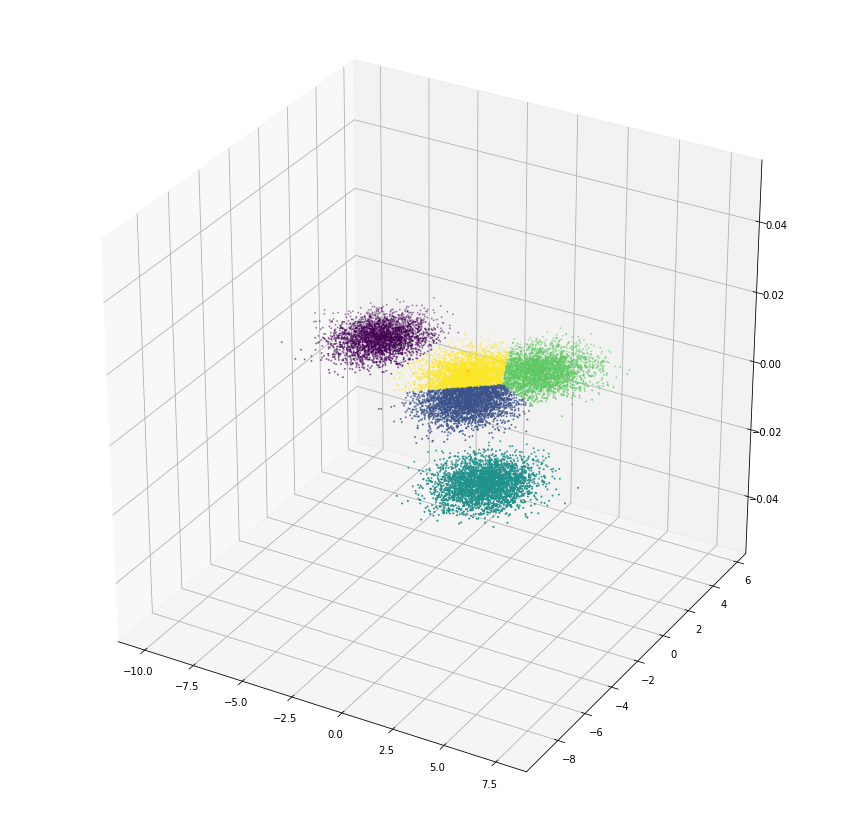

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],s=1,c=y_hat)
plt.scatter(means[:,0],means[:,1],c="r",s=15)


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[:,0],X[:,1],s=1, c = y_hat)
plt.scatter(means[:,0],means[:,1], c='r',s=15)

randomize means

In [8]:
k=5

In [9]:
#look at all indices in x and then take k of the indices at random then add to means array
indices = np.arange(X.shape[0])
sample_indices = np.random.choice(indices,size=k,replace=False)
means = X[sample_indices]

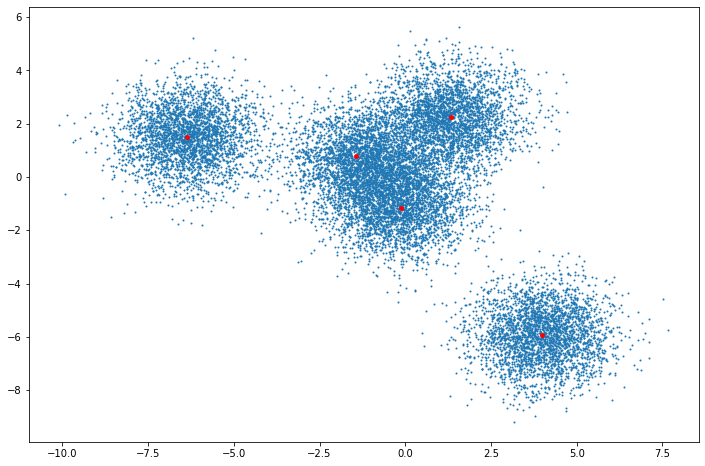

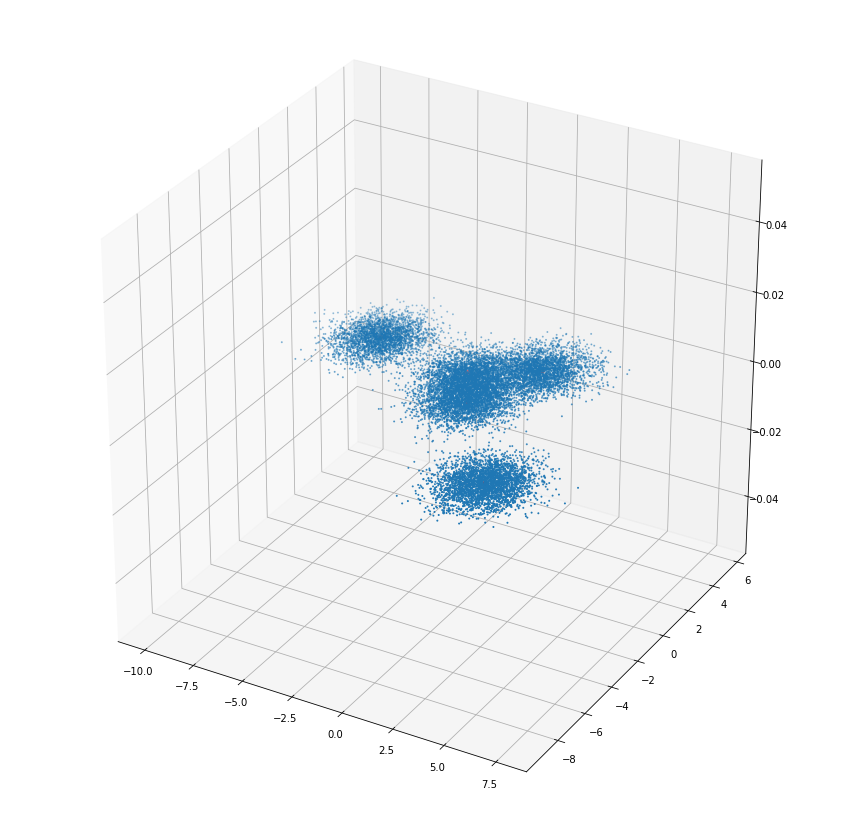

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],s=1)
plt.scatter(means[:,0],means[:,1], c='r',s=15)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[:,0],X[:,1],s=1)
plt.scatter(means[:,0],means[:,1], c='r',s=15)

In [11]:
dist2 = Distance(X,means)
y_hat = np.argmin(dist2,axis=1)

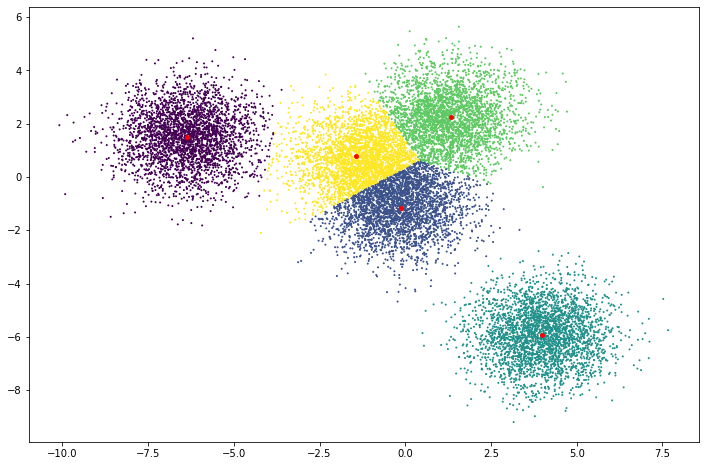

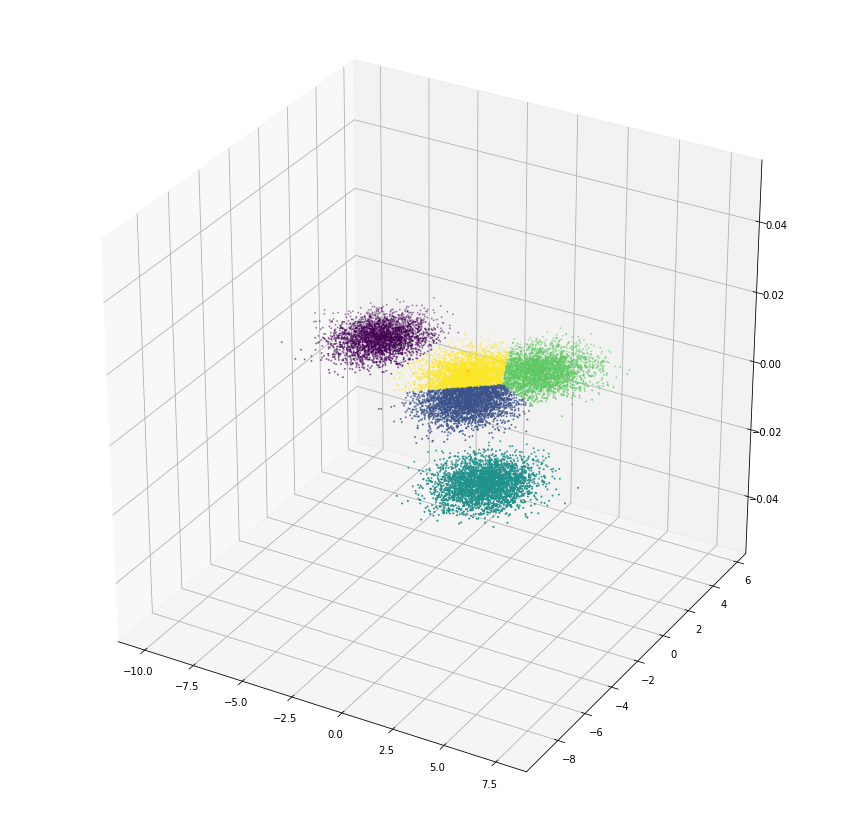

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],s=1,c=y_hat)
plt.scatter(means[:,0],means[:,1],c="r",s=15)


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[:,0],X[:,1],s=1, c = y_hat)
plt.scatter(means[:,0],means[:,1], c='r',s=15)

In [13]:
means = []
for i in range(k):
  mean=np.mean(X[y_hat==i],axis=0)
  means.append(mean)
means = np.vstack(means)


In [14]:
means

array([[-6.36491022,  1.50219629],
       [ 0.14706378,  1.44444094],
       [ 3.96716375, -6.69325846],
       [-0.52694048, -1.36262338],
       [ 3.97098254, -5.06092593]])

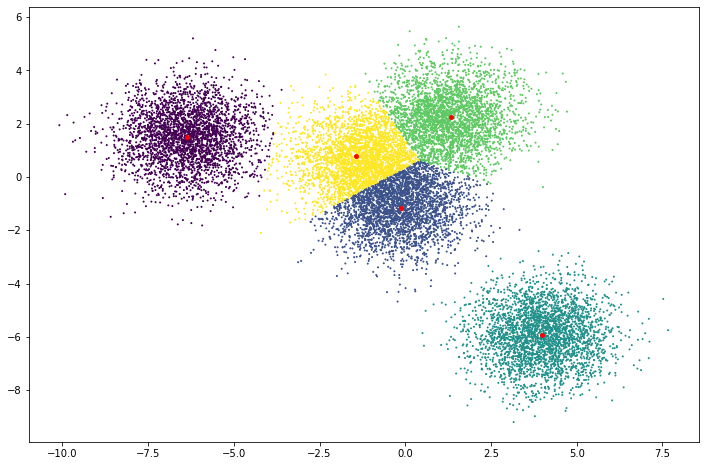

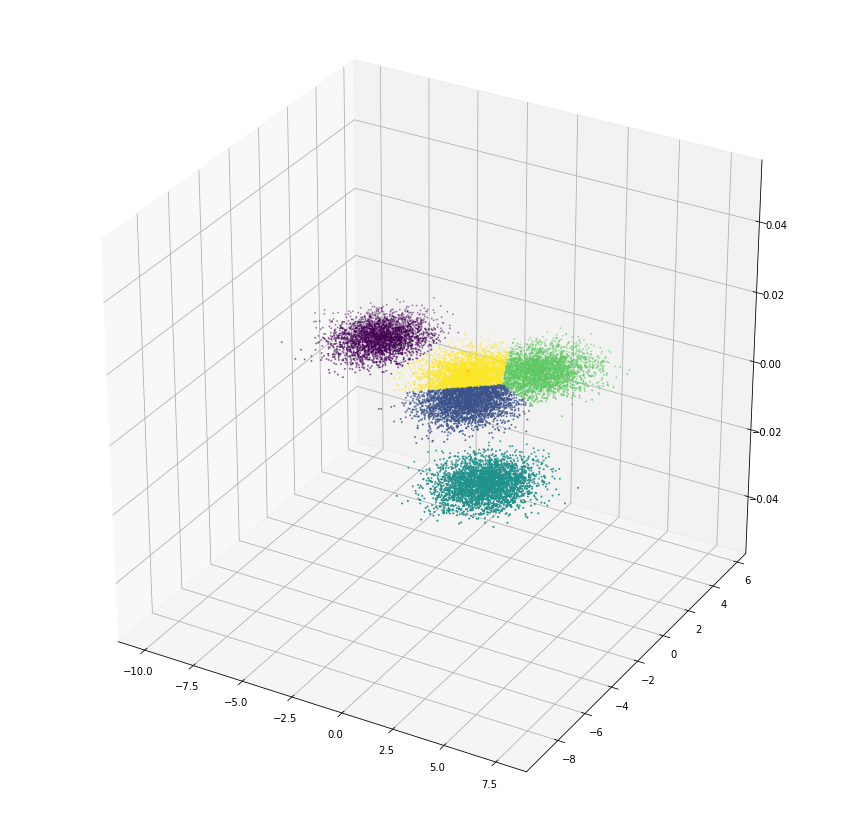

In [36]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],s=1,c=y_hat)
plt.scatter(means[:,0],means[:,1],c="r",s=15)


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[:,0],X[:,1],s=1, c = y_hat)
plt.scatter(means[:,0],means[:,1], c='r',s=15)

In [16]:
dist3 = Distance(X,means)
y_hat = np.argmin(dist3,axis=1)
means = []
for i in range(k):
  mean=np.mean(X[y_hat==i],axis=0)
  means.append(mean)
means = np.vstack(means)


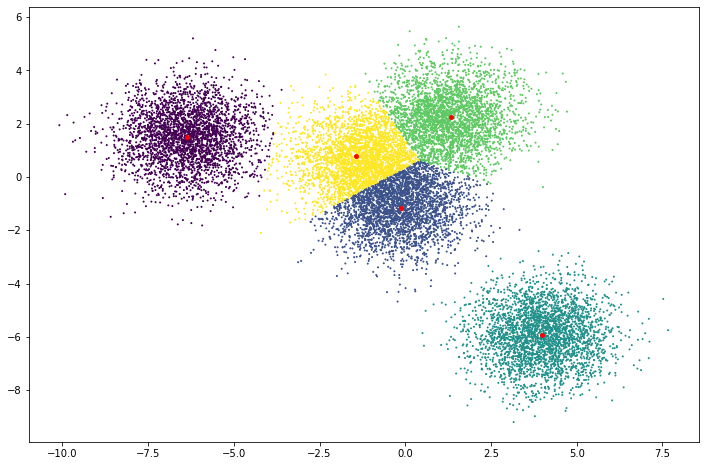

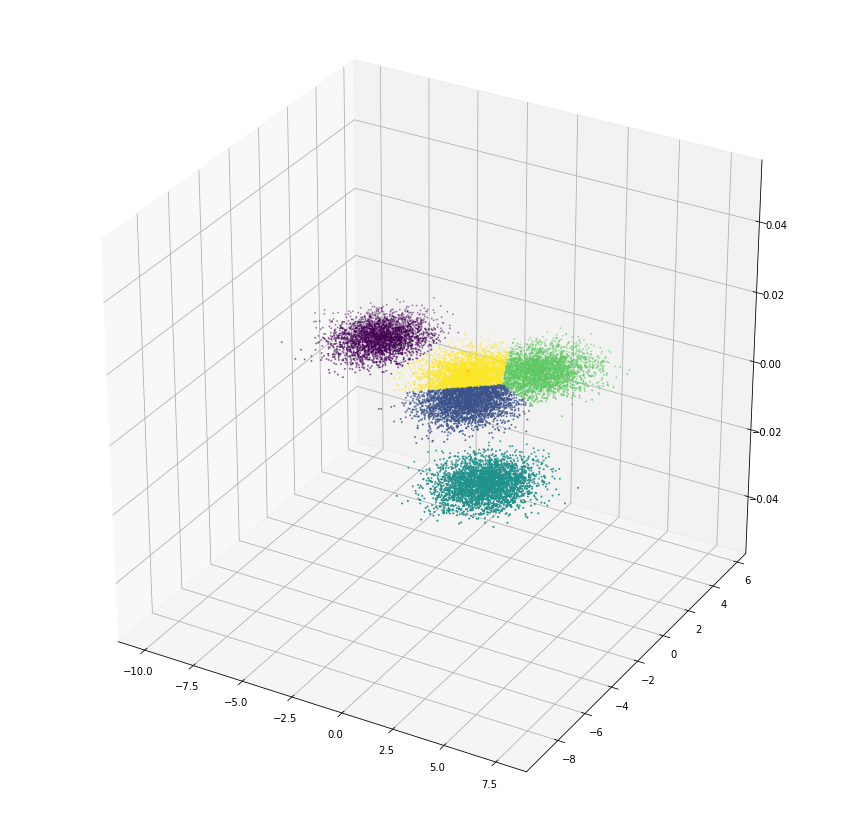

In [35]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],s=1,c=y_hat)
plt.scatter(means[:,0],means[:,1],c="r",s=15)


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[:,0],X[:,1],s=1, c = y_hat)
plt.scatter(means[:,0],means[:,1], c='r',s=15)

#k-means class

In [18]:
def KMeans(X,k,iterations=3):
  indices = np.arange(X.shape[0])
  sample_indices = np.random.choice(indices,size=k,replace=False)
  means = X[sample_indices]

  for i in range(iterations):
    dist=Distance(X,means)
    y_hat = np.argmin(dist,axis=1)
    means=[]

    for n in range(k):
      mean = np.mean(X[y_hat==n],axis=0)
      means.append(mean)
    means=np.vstack(means)

  dist = Distance(X,means)
  y_hat=np.argmin(dist,axis=1)
  return (y_hat,means)







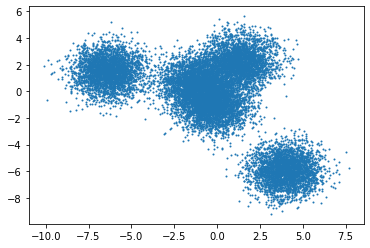

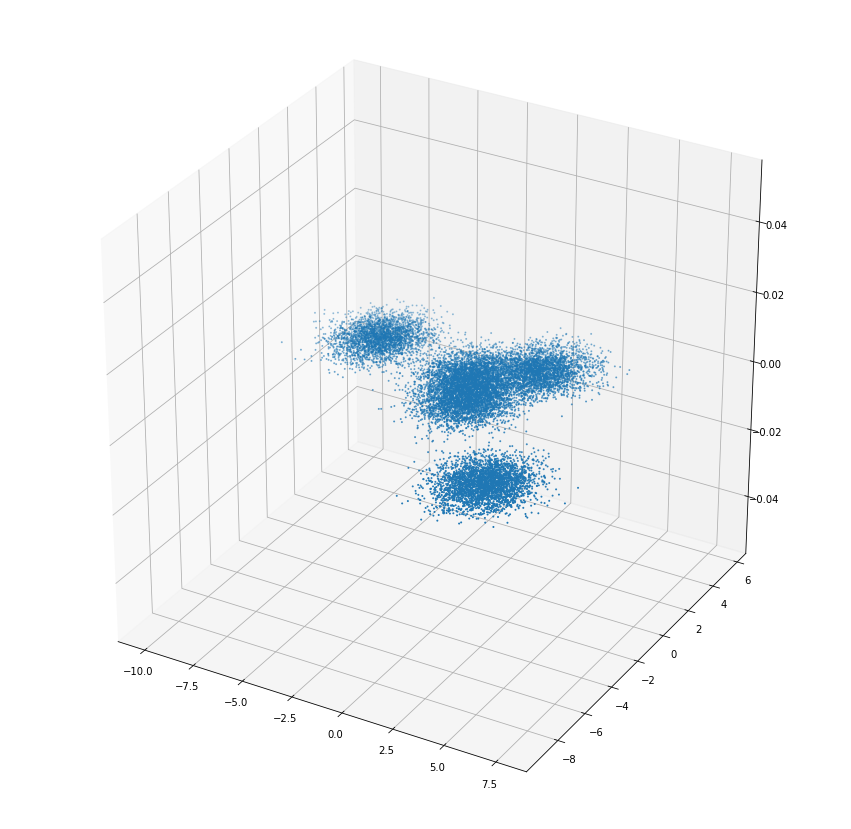

In [34]:
plt.scatter(X[:,0],X[:,1],s=1)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[:,0],X[:,1],s=1)


In [20]:
y_hat,means=KMeans(X,5,iterations=6)


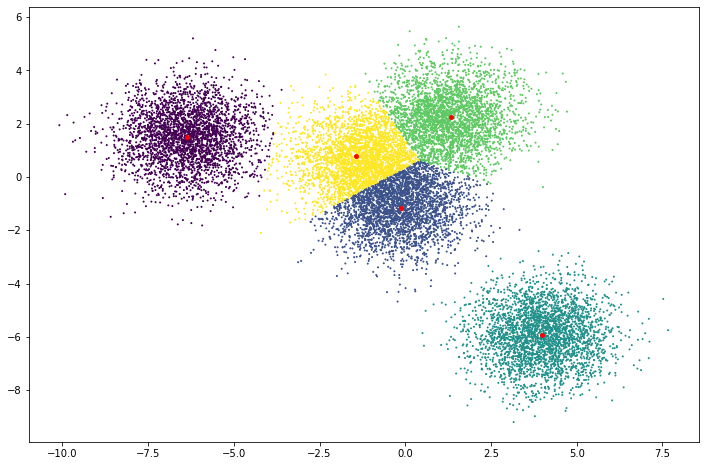

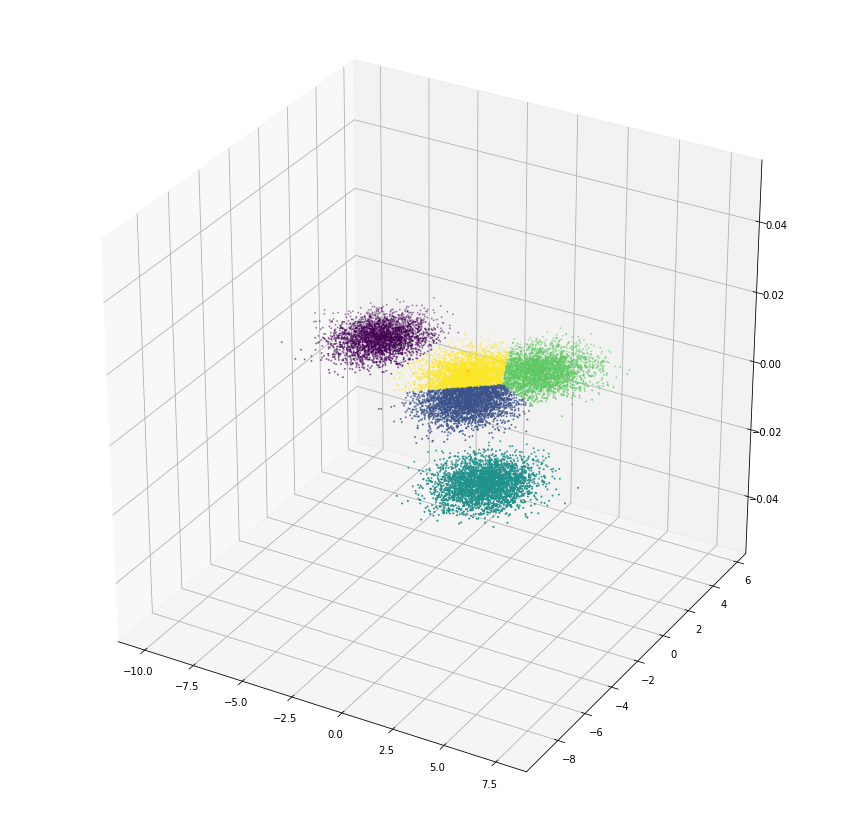

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],s=1,c=y_hat)
plt.scatter(means[:,0],means[:,1],c="r",s=15)


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[:,0],X[:,1],s=1, c = y_hat)
plt.scatter(means[:,0],means[:,1], c='r',s=15)

# responsiblity weighted arithmetic mean

#Responsibility

# $ r_{i,k} =\frac {e^{-\beta || x_i - m_k ||^2}}{\sum_{i=0}^{N} e^{-\beta || x_i -m_k|| ^2}} $

# Weighted Arithmetic Mean

#$m_k =\frac {\sum_{i=1}^N r_{i,k} x_i}{\sum_s r_{s,k}}$

In [22]:
def Responsibility(X,means,beta=1e-3,*args,**kwargs):
  diff = []
  responsibilities = []

  for mean in means:
    diff= X - mean
    dist =  (np.sum(diff **2,axis=1, keepdims=True   ))
    numerator = np.exp(-beta*dist)
    denominator = np.sum(numerator)

    responsibility = -numerator/denominator

    responsibilities.append(responsibility)
  return np.hstack(responsibilities)

In [30]:
class K_means:
  def __init__(self ,k, distance_func = Distance, beta=None):

    self.k = k
    self.distance_func = distance_func
    self.beta = beta
  
  def Fit(self,X,iterations=5):
    indices = np.arange(X.shape[0])
    sample_indices = np.random.choice(indices,size=self.k,replace=False)
    self.means = X[sample_indices]

    for i in range(iterations):
      y_hat = self.Predict(X)
      self.means = []
      for j in range(self.k):
        mean = np.mean(X[y_hat==j],axis=0)
        self.means.append(mean)
      self.means = np.vstack(self.means)

    y_hat = self.Predict(X)
    plt.figure(figsize=(12,8))
    plt.scatter(X[:,0],X[:,1],s=1,c=y_hat             )
    plt.scatter(self.means[:,0],self.means[:,1],c="r",s=10                      )


    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111, projection='3d')
    plt.scatter(X[:,0],X[:,1],s=1, c = y_hat)
    plt.scatter(means[:,0],means[:,1], c='r',s=15)
    return y_hat

  def Predict(self,X):
    dist=self.distance_func(X,self.means,self.beta )
    y_hat = np.argmin(dist,axis=1  )
    return y_hat





In [31]:
soft_k = K_means(5,distance_func=Responsibility,beta=1.8      )

array([4, 4, 0, ..., 4, 4, 4])

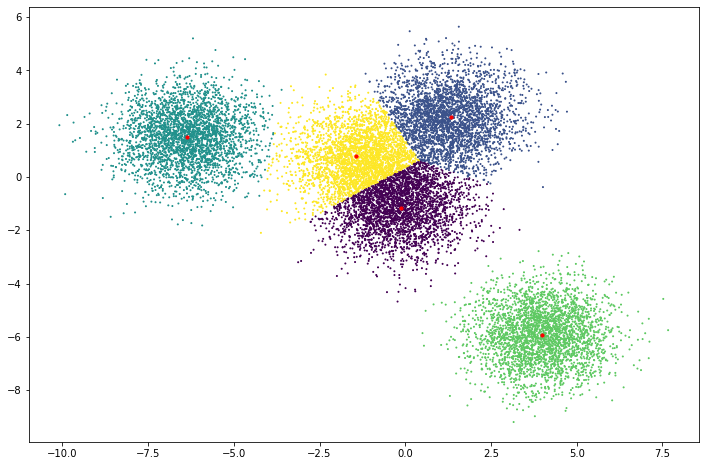

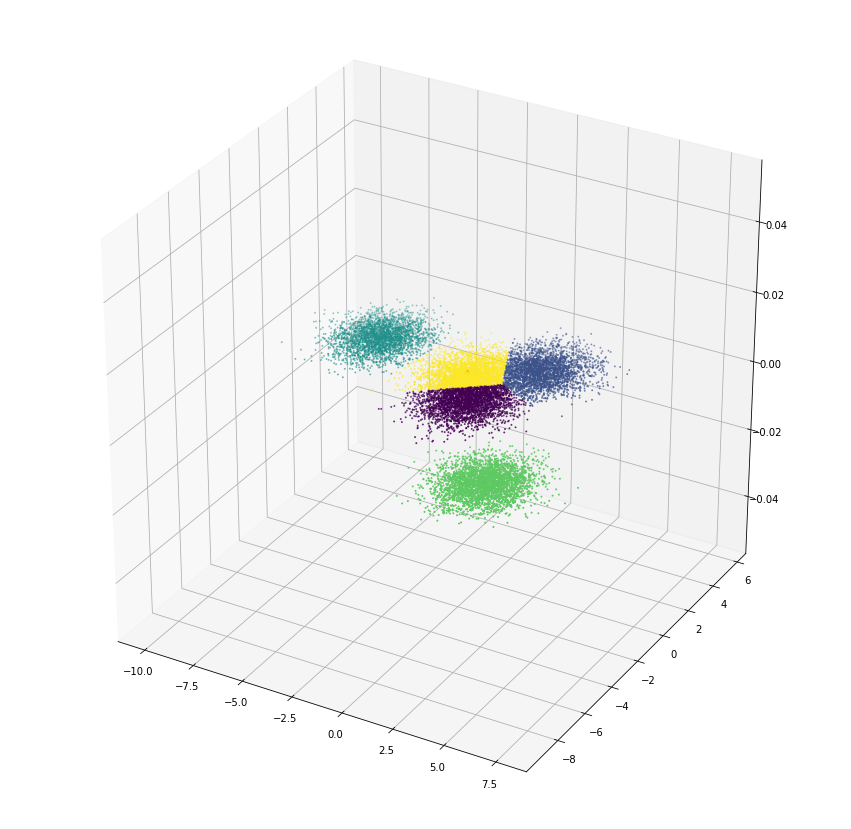

In [32]:
soft_k.Fit(X,iterations=8)

In [26]:
soft_k.Predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
x10 = soft_k.Predict(X)

In [28]:
len(x10)

15000

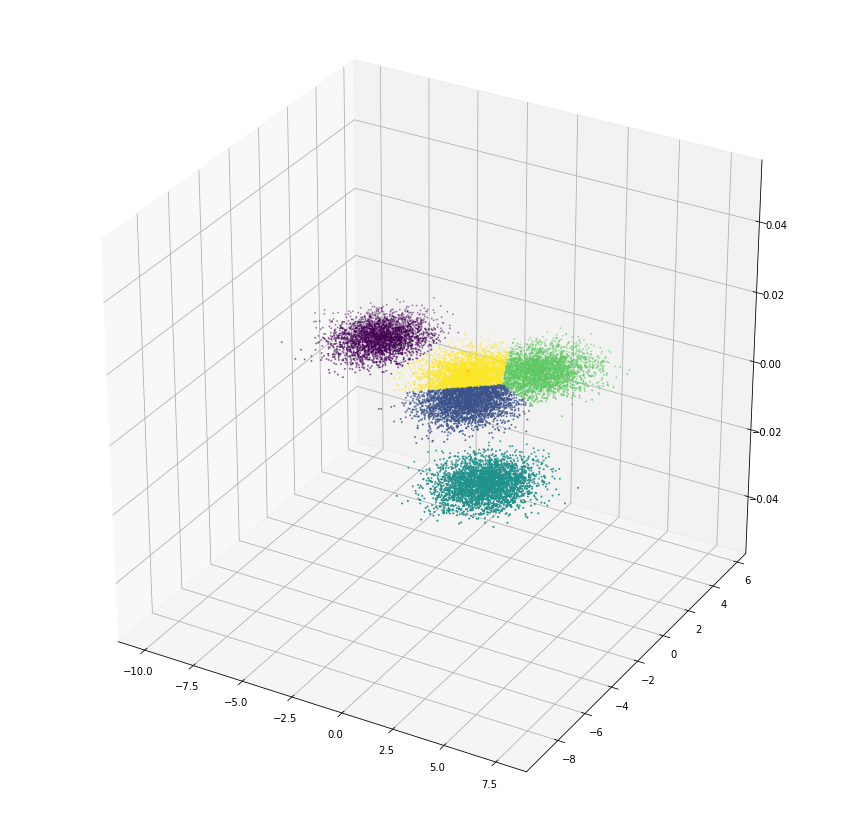

In [29]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[:,0],X[:,1],s=1, c = y_hat)
plt.scatter(means[:,0],means[:,1], c='r',s=15)